In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

In [3]:
path="/kaggle/input/realwaste/realwaste-main/RealWaste"
folders=os.listdir("/kaggle/input/realwaste/realwaste-main/RealWaste")
folders

['Metal',
 'Glass',
 'Paper',
 'Vegetation',
 'Cardboard',
 'Textile Trash',
 'Food Organics',
 'Plastic',
 'Miscellaneous Trash']

Images in folder Metal:


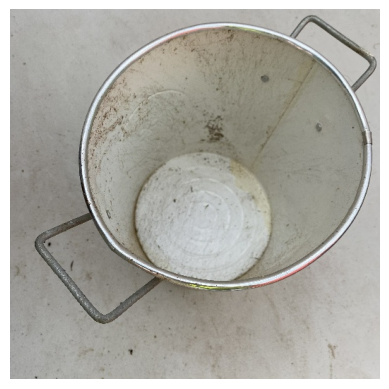

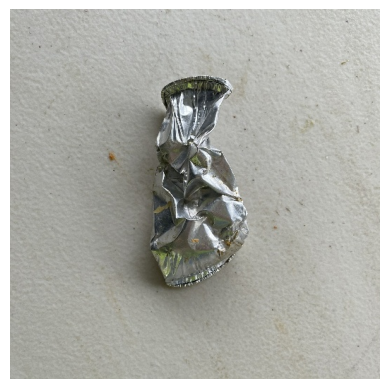

Images in folder Glass:


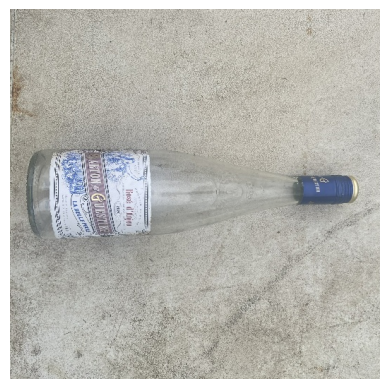

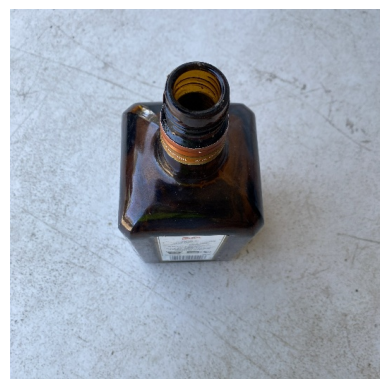

Images in folder Paper:


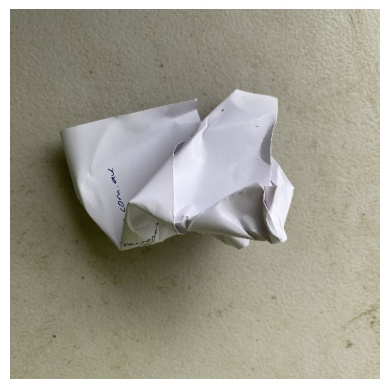

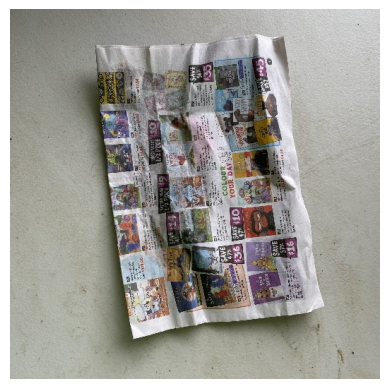

Images in folder Vegetation:


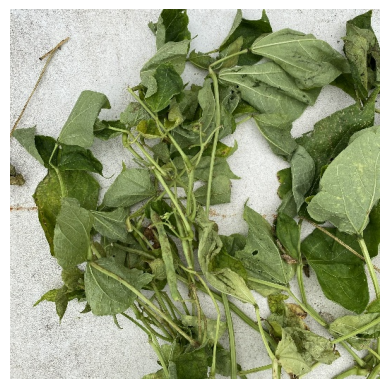

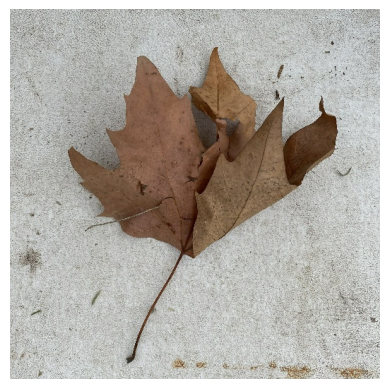

Images in folder Cardboard:


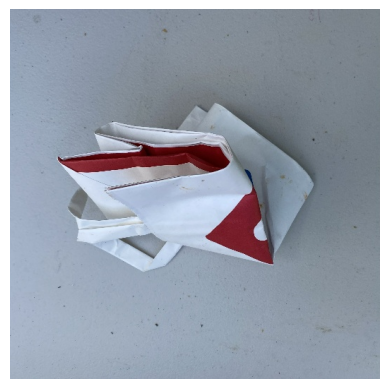

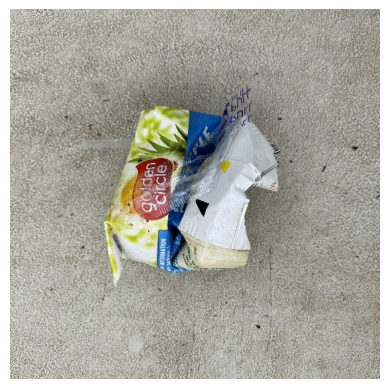

Images in folder Textile Trash:


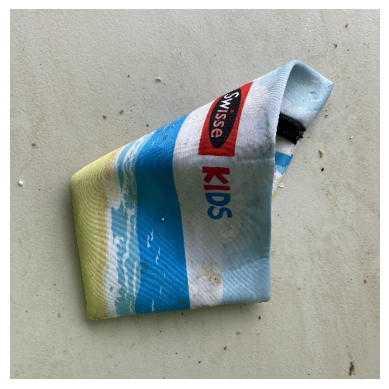

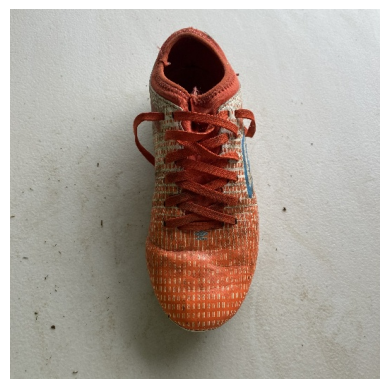

Images in folder Food Organics:


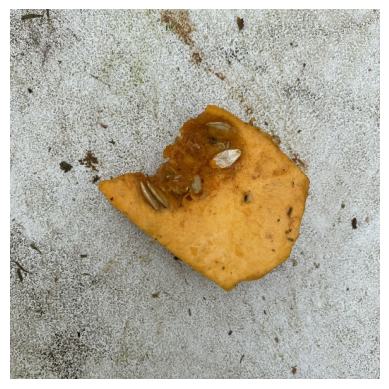

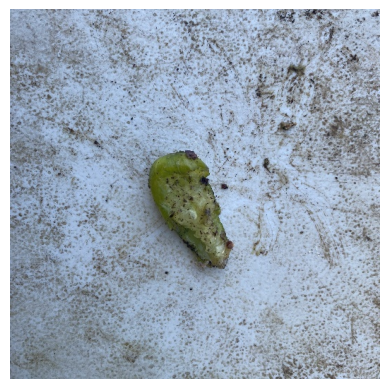

Images in folder Plastic:


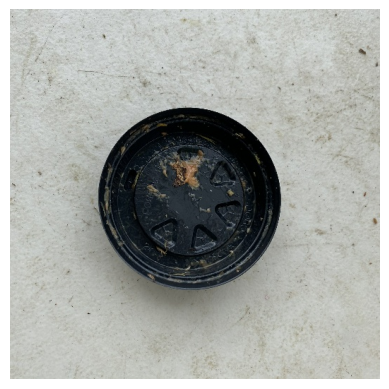

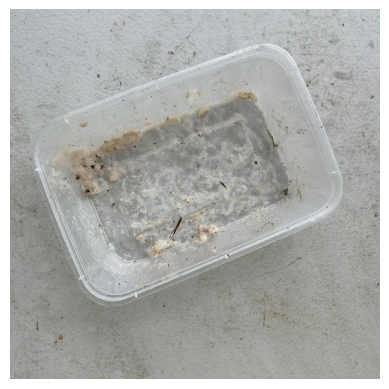

Images in folder Miscellaneous Trash:


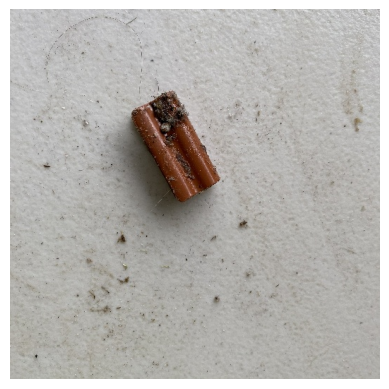

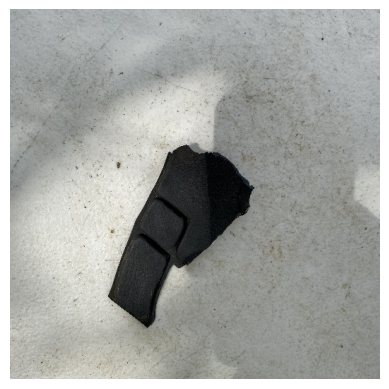

In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "/kaggle/input/realwaste/realwaste-main/RealWaste"
folders = os.listdir(path)

for folder in folders:
    folder_path = os.path.join(path, folder)
    files = os.listdir(folder_path)
    
    print(f"Images in folder {folder}:")
    count =0
    for file in files:
        img_path = os.path.join(folder_path, file)
        
        # Display the image
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels
        plt.show()
        
        count += 1
        if count == 2:
            break

In [9]:
images=[]
labels=[]
f=0
for foldername in folders:
    imgs_path=path+f"/{foldername}"
    folder_images=os.listdir(imgs_path)
#     print(len(folder_images),f)
    for imgname in os.listdir(imgs_path):
        img = cv2.imread(os.path.join(imgs_path, imgname))
        img = img_to_array(img)
        images.append(img)
        labels.append(f) 
    f=f+1
temp = list(zip(images,labels))
random.shuffle(temp)
images, labels = zip(*temp)
# res1, res2 = list(res1), list(res2)
X_train, X_test, y_train, y_test= train_test_split(images, labels,test_size=0.2)


In [10]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
X_train.shape, X_test.shape

((3801, 524, 524, 3), (951, 524, 524, 3))

In [13]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = Xception(weights='imagenet', include_top=False, input_shape=(524,524,3))
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = layers.Dense(9, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

In [14]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 524, 524, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 261, 261, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 261, 261, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 261, 261, 32)         0         ['block1_conv1_bn[0][0]'

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
95/95 [==============================] - 438s 5s/step - loss: 1.4641 - accuracy: 0.4727 - val_loss: 0.8633 - val_accuracy: 0.6886
Epoch 2/10
95/95 [==============================] - 436s 5s/step - loss: 0.9324 - accuracy: 0.6704 - val_loss: 0.7078 - val_accuracy: 0.7608
Epoch 3/10
95/95 [==============================] - 443s 5s/step - loss: 0.7254 - accuracy: 0.7428 - val_loss: 0.5981 - val_accuracy: 0.7871
Epoch 4/10
95/95 [==============================] - 445s 5s/step - loss: 0.6196 - accuracy: 0.7760 - val_loss: 0.5719 - val_accuracy: 0.7792
Epoch 5/10
95/95 [==============================] - 447s 5s/step - loss: 0.5510 - accuracy: 0.8089 - val_loss: 0.5156 - val_accuracy: 0.7989
Epoch 6/10
95/95 [==============================] - 451s 5s/step - loss: 0.4881 - accuracy: 0.8316 - val_loss: 0.5212 - val_accuracy: 0.8042
Epoch 7/10
95/95 [==============================] - 446s 5s/step - loss: 0.4358 - accuracy: 0.8477 - val_loss: 0.4718 - val_accuracy: 0.8147
Epoch 8/10
95

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

30/30 [==============================] - 115s 4s/step - loss: 0.3980 - accuracy: 0.8591
Test loss: 0.39798668026924133
Test accuracy: 0.8590956926345825


In [18]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(X_test)

30/30 [==============================] - 114s 4s/step


In [19]:
y_pred=np.argmax(y_pred, axis=1)
print(y_pred)

[3 1 0 8 7 7 1 6 6 1 2 1 5 3 1 7 5 6 0 6 7 2 4 7 2 7 3 7 6 8 8 6 2 0 7 3 7
 1 8 4 3 4 6 4 4 2 3 3 7 7 2 0 7 1 7 7 7 4 7 0 2 8 0 0 8 6 3 0 0 2 7 6 7 7
 7 5 6 1 4 4 6 0 0 4 7 1 7 0 7 0 3 2 4 2 4 0 4 6 5 1 2 2 1 3 8 5 5 7 3 0 0
 3 0 3 8 7 5 0 7 5 0 0 2 0 7 3 1 7 4 7 7 5 6 0 0 7 6 2 0 4 5 2 6 5 4 6 7 2
 1 3 3 7 6 1 2 6 0 5 1 2 6 7 8 2 7 0 4 7 1 3 7 1 1 3 0 2 6 4 2 5 6 7 1 2 6
 6 6 1 4 3 7 2 4 8 4 0 7 5 3 1 5 3 1 7 0 4 0 7 6 4 7 3 0 0 0 1 0 6 0 6 7 2
 2 3 4 7 7 4 7 2 7 7 8 3 8 8 4 3 5 2 5 8 6 5 0 3 2 7 7 0 6 4 0 4 2 6 8 7 4
 7 6 8 0 8 7 6 0 7 1 0 0 1 2 5 5 7 2 2 1 0 3 2 2 0 7 8 6 7 4 0 4 5 0 0 4 8
 3 0 6 6 3 0 1 6 1 4 4 1 0 0 4 7 6 3 7 4 4 8 6 1 0 7 0 1 0 2 6 4 5 8 7 0 3
 4 6 7 0 4 1 3 8 3 5 3 4 2 7 2 4 7 8 5 2 6 1 1 5 1 1 0 1 8 8 1 0 5 0 8 6 0
 7 8 7 5 7 7 2 4 1 1 4 6 6 7 0 1 3 7 1 0 3 8 5 2 2 1 0 7 1 0 3 7 4 1 8 2 8
 8 2 8 7 5 1 0 7 6 6 3 0 2 7 8 5 6 2 0 6 2 7 6 0 7 8 0 3 0 7 4 2 0 7 0 2 4
 7 0 7 6 7 0 5 2 6 1 1 0 3 4 0 7 2 0 3 1 6 0 4 5 0 0 7 2 4 0 1 3 1 7 0 0 1
 5 2 1 0 7 4 0 6 4 4 3 0 

In [20]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[145,   0,   0,   0,   2,   0,   0,   8,   3],
       [  0,  90,   0,   0,   1,   0,   0,  16,   0],
       [  0,   0,  83,   0,  11,   1,   0,   1,   1],
       [  0,   0,   0,  79,   0,   0,   5,   0,   3],
       [  0,   0,   6,   0,  78,   0,   0,   4,   0],
       [  0,   0,   4,   1,   1,  59,   0,   0,   3],
       [  0,   0,   0,   3,   1,   0,  80,   1,   1],
       [ 10,   4,   0,   0,   7,   0,   1, 146,   0],
       [  8,   3,   3,   1,   1,   4,   8,   7,  57]])